# Image Classification using Deep Learning

**Import required libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.applications.vgg16 import VGG16
from keras.applications.resnet import ResNet50
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.models import Sequential, Model
from keras.preprocessing import image
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

**Loading and Pre-processing the training data**

In [2]:
train_datagen = image.ImageDataGenerator(
    rescale = 1/225, horizontal_flip = True, zoom_range = 0.2, shear_range = 0.2
)
train_data = train_datagen.flow_from_directory(directory = "/content/drive/MyDrive/MP-2/Dataset/Train",target_size = (256,256), batch_size = 64,
                                               class_mode = "categorical")

Found 12000 images belonging to 3 classes.


In [3]:
train_data.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

**Loading and Pre-processing the testing data**

In [4]:
test_datagen = image.ImageDataGenerator(rescale = 1./225)
test_data = test_datagen.flow_from_directory(directory = "/content/drive/MyDrive/MP-2/Dataset/Test",target_size = (256,256), batch_size = 64,
                                               class_mode = "categorical")

Found 3000 images belonging to 3 classes.


In [5]:
test_data.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

**Importing CNN Model**

In [6]:
vgg = VGG16( input_shape=(256,256,3), include_top= False) # include_top will consider the new weights

In [7]:
for layer in vgg.layers:           # Dont Train the parameters again 
  layer.trainable = False

In [8]:
x = Flatten()(vgg.output)
x = Dense(units=3 , activation='sigmoid', name = 'predictions' )(x)

model1 = Model(vgg.input, x)

In [9]:
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [10]:
model1.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [11]:
es = EarlyStopping(monitor= "val_accuracy" , min_delta= 0.001, patience= 3, verbose=1)
mc = ModelCheckpoint(filepath="/content/drive/MyDrive/MP-2/vgg16", monitor="val_accuracy", verbose=1, save_best_only= True)

In [12]:
model1.fit(train_data, epochs = 10, validation_data= test_data, callbacks=[es,mc])

Epoch 1/10
188/188 [==============================] - ETA: 0s - loss: 0.3330 - accuracy: 0.8678
Epoch 1: val_accuracy improved from -inf to 0.89167, saving model to /content/drive/MyDrive/MP-2/vgg16
INFO:tensorflow:Assets written to: /content/drive/MyDrive/MP-2/vgg16/assets
188/188 [==============================] - 428s 2s/step - loss: 0.3330 - accuracy: 0.8678 - val_loss: 0.2794 - val_accuracy: 0.8917
Epoch 2/10
188/188 [==============================] - ETA: 0s - loss: 0.1873 - accuracy: 0.9299
Epoch 2: val_accuracy improved from 0.89167 to 0.90867, saving model to /content/drive/MyDrive/MP-2/vgg16
INFO:tensorflow:Assets written to: /content/drive/MyDrive/MP-2/vgg16/assets
188/188 [==============================] - 300s 2s/step - loss: 0.1873 - accuracy: 0.9299 - val_loss: 0.2385 - val_accuracy: 0.9087
Epoch 3/10
188/188 [==============================] - ETA: 0s - loss: 0.1505 - accuracy: 0.9439
Epoch 3: val_accuracy did not improve from 0.90867
188/188 [===========================

In [21]:
path = "/content/drive/MyDrive/MP-2/test/viral pneumonia (1).jpeg"
#/content/drive/MyDrive/MP-2/New/Covid19-dataset/test/Covid/098.jpeg
#/content/drive/MyDrive/MP-2/New/Covid19-dataset/test/Normal/0107.jpeg
#/content/drive/MyDrive/MP-2/New/Covid19-dataset/test/Viral Pneumonia/0115.jpeg
img = image.load_img(path,target_size=(256,256,3))
img = image.img_to_array(img)/255
img = np.array([img])
img.shape

(1, 256, 256, 3)

In [22]:
#load only best model
from keras.models import load_model
model = load_model("/content/drive/MyDrive/MP-2/vgg16")
print(model.predict(img))
np.argmax(model.predict(img))

[[0.00820666 0.1850859  0.99960405]]


2

In [15]:
model1.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

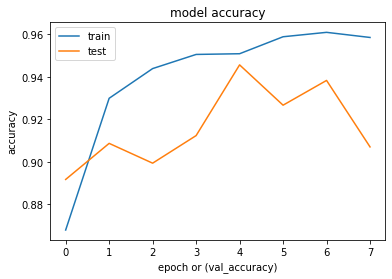

In [16]:
#summarize model for accuracy
plt.plot(model1.history.history['accuracy'])
plt.plot(model1.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch or (val_accuracy)')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

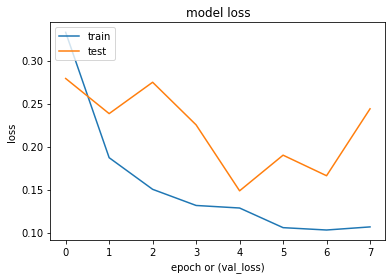

In [17]:
#summarize history for loss
plt.plot(model1.history.history['loss'])
plt.plot(model1.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch or (val_loss)')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

#Accuracy 

In [18]:
acc = model.evaluate(test_data)[1] 

print(f"The accuracy of the model is = {acc} %")

47/47 [==============================] - 57s 1s/step - loss: 0.1487 - accuracy: 0.9457
The accuracy of the model is = 0.9456666707992554 %
